<a href="https://colab.research.google.com/github/hemanth714444/2203A52192-lab-1-deep-learning/blob/main/DEEP_LEARNING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.read_csv('/content/fake_and_real_news.csv.zip')
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [ ]:
df.shape

(9900, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9900 non-null   object
 1   label   9900 non-null   object
dtypes: object(2)
memory usage: 154.8+ KB


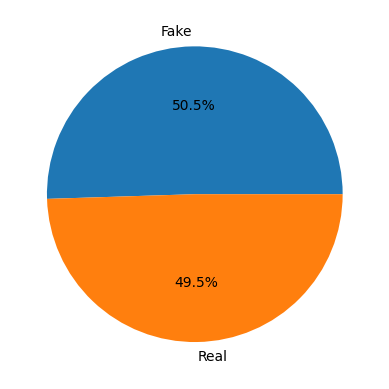

In [ ]:
plt.pie(df['label'].value_counts().values, # Changed 'class' to 'label'
        labels = df['label'].value_counts().index, # Changed 'class' to 'label'
        autopct='%1.1f%%')
plt.show()

In [ ]:

df['Text'] = df['Text'].str.lower()

punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

df['Text']= df['Text'].apply(lambda x: remove_punctuations(x))
df.head()

,Text,label
0,top trump surrogate brutally stab back ‘he’s p...,0
1,u conservative leader optimistic common ground...,1
2,trump proposes u tax overhaul stir concern def...,1
3,court force ohio allow million illegally purge...,0
4,democrat say trump agrees work immigration bil...,1


In [ ]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():

        if word not in stop_words:



            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)

            imp_words.append(word)

    output = " ".join(imp_words)

    return output


df['Text'] = df['Text'].apply(lambda text: remove_stopwords(text))
df.head()


,Text,label
0,top trump surrogate brutally stab back ‘he’s p...,0
1,u conservative leader optimistic common ground...,1
2,trump proposes u tax overhaul stir concern def...,1
3,court force ohio allow million illegally purge...,0
4,democrat say trump agrees work immigration bil...,1


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1LMJfrbkYj0UIiOU3rLww2bOKv9H3RlM28q6r-OFUad4#gid=0


[0 1]


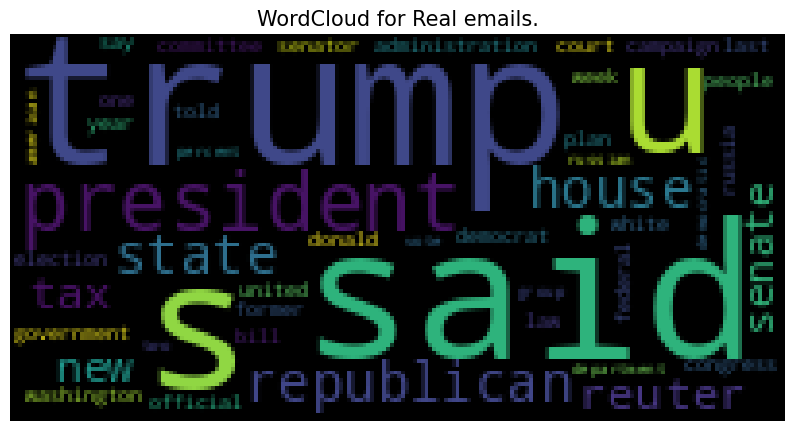

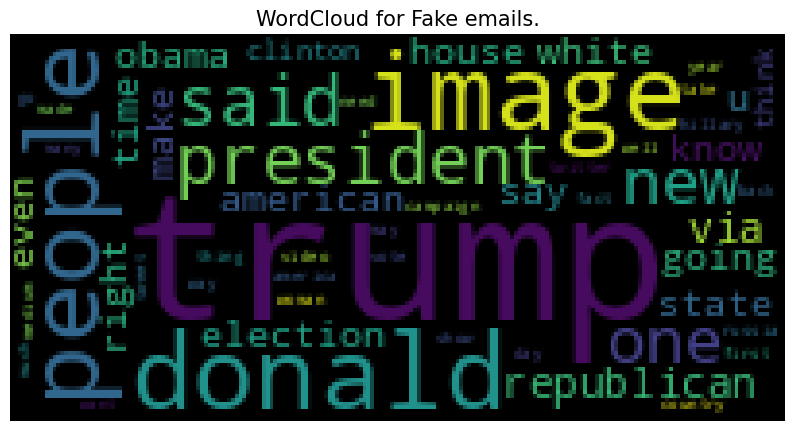

In [ ]:
def plot_word_cloud(data, typ):

  email_corpus = " ".join(data['Text'])

  if not email_corpus.strip():
    print(f"No text found for {typ} emails. Cannot generate WordCloud.")
    return

  plt.figure(figsize = (10,10))

  # Forming the word cloud
  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(email_corpus)

  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

print(df['label'].unique()) # Print unique values of 'label'
plot_word_cloud(df[df['label']==1], typ='Real')
plot_word_cloud(df[df['label']==0], typ='Fake')

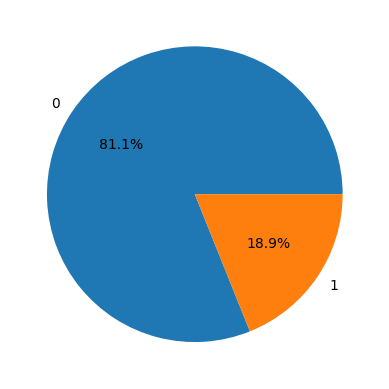

In [ ]:
class_2 = df[df['label'] == 2]
class_1 = df[df['label'] == 1].sample(n=3500)
class_0 = df[df['label'] == 0]

balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)
plt.pie(balanced_df['label'].value_counts().values,
        labels=balanced_df['label'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [ ]:
features = balanced_df['Text']
target = balanced_df['label']

X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size=0.2,
                                                  random_state=22)
X_train.shape, X_val.shape


((14800,), (3700,))

In [ ]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape


((14800, 2), (3700, 2))

In [ ]:
max_words = 5000
max_len = 100

token = Tokenizer(num_words=max_words,
                  lower=True,
                  split=' ')

token.fit_on_texts(X_train)


In [ ]:

max_words = 5000
token = Tokenizer(num_words=max_words,
                lower=True,
                split=' ')
token.fit_on_texts(X_train)


Training_seq = token.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')

Testing_seq = token.texts_to_sequences(X_val)
Testing_pad = pad_sequences(Testing_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')



In [ ]:
model = keras.models.Sequential([
    layers.Embedding(max_words, 32, input_length=max_len),
    layers.Bidirectional(layers.LSTM(16)),
    layers.Dense(512, activation='relu', kernel_regularizer='l1'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=3,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 0)


In [ ]:

max_words = 5000
max_len = 100  # Make sure max_len is consistent
tokenizer = Tokenizer(num_words=max_words)


X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=22)

tokenizer.fit_on_texts(X_train)


X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)


from tensorflow.keras.utils import pad_sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')

num_classes = 3


from tensorflow.keras.utils import to_categorical
Y_train_encoded = to_categorical(Y_train, num_classes=num_classes)
Y_val_encoded = to_categorical(Y_val, num_classes=num_classes)

model = keras.models.Sequential([
    layers.Embedding(max_words, 32, input_length=max_len),  # Use max_len here
    layers.Bidirectional(layers.LSTM(16)),
    layers.Dense(512, activation='relu', kernel_regularizer='l1'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train_padded, Y_train_encoded,
                    validation_data=(X_val_padded, Y_val_encoded),
                    epochs=200,
                    verbose=1,
                    batch_size=32,
                    callbacks=[lr, es])

Epoch 1/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 42s 77ms/step - accuracy: 0.9502 - loss: 2.5372 - val_accuracy: 0.8114 - val_loss: 0.2347 - learning_rate: 0.0010
Epoch 2/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9987 - loss: 0.1241 - val_accuracy: 1.0000 - val_loss: 0.0269 - learning_rate: 0.0010
Epoch 3/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 38s 65ms/step - accuracy: 1.0000 - loss: 0.0269 - val_accuracy: 1.0000 - val_loss: 0.0235 - learning_rate: 0.0010
Epoch 4/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 1.0000 - loss: 0.0243 - val_accuracy: 1.0000 - val_loss: 0.0230 - learning_rate: 0.0010
Epoch 5/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 1.0000 - loss: 0.0256 - val_accuracy: 1.0000 - val_loss: 0.0224 - learning_rate: 0.0010


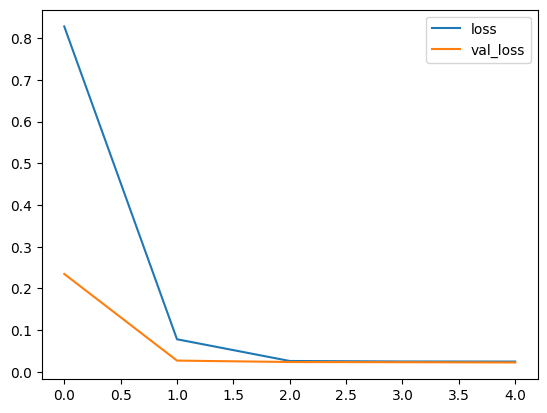

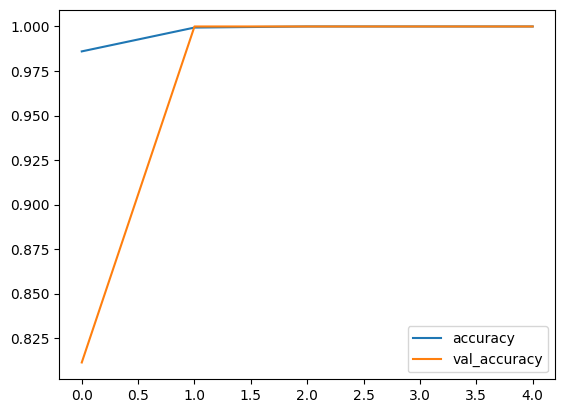

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


input_shape = (360, 363, 3)
cnn_model = create_cnn_model(input_shape)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 358, 361, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 179, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 177, 178, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 88, 89, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 86, 87, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 478848)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │      30,646,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,702,721 (117.12 MB)

 Trainable params: 30,702,721 (117.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

from tensorflow.keras import layers, Sequential


def create_lstm_model(input_shape):
    model = Sequential()
    model.add(layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(layers.LSTM(32))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


input_shape = (30, 128)
lstm_model = create_lstm_model(input_shape)
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,857 (241.63 KB)

 Trainable params: 61,857 (241.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:


def create_gru_model(input_shape):
    model = Sequential()
    model.add(layers.GRU(64, input_shape=input_shape, return_sequences=True))
    model.add(layers.GRU(32))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

input_shape = (30, 128)
gru_model = create_gru_model(input_shape)
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30, 64)              │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,689 (182.38 KB)

 Trainable params: 46,689 (182.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

from tensorflow.keras.utils import to_categorical


Y_train_encoded = to_categorical(Y_train, num_classes=3)
Y_val_encoded = to_categorical(Y_val, num_classes=3)


model_rnn = keras.models.Sequential([
    layers.Embedding(max_words, 32, input_length=max_len),
    layers.SimpleRNN(16),
    layers.Dense(512, activation='relu', kernel_regularizer='l1'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])


model_rnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_rnn = model_rnn.fit(X_train_padded, Y_train_encoded,
                    validation_data=(X_val_padded, Y_val_encoded),
                    epochs=200,
                    verbose=1,
                    batch_size=32,
                    callbacks=[lr, es])

Epoch 1/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.8475 - loss: 2.1926 - val_accuracy: 0.8114 - val_loss: 0.3238 - learning_rate: 0.0010
Epoch 2/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9804 - loss: 0.1127 - val_accuracy: 0.9930 - val_loss: 0.0692 - learning_rate: 0.0010
Epoch 3/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9762 - loss: 0.1089 - val_accuracy: 0.1886 - val_loss: 1.3746 - learning_rate: 0.0010
Epoch 4/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9704 - loss: 0.1328 - val_accuracy: 0.3457 - val_loss: 3.9578 - learning_rate: 0.0010
Epoch 5/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9430 - loss: 0.1667 - val_accuracy: 0.9941 - val_loss: 0.0494 - learning_rate: 5.0000e-04
Epoch 6/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9958 - loss: 0.0364 - val_accuracy: 0.9851 - val_loss: 0.0717 - learning_rate: 5.0000e-04
Epoch 7/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accur

In [ ]:

from tensorflow.keras.utils import to_categorical


Y_train_encoded = to_categorical(Y_train, num_classes=3)
Y_val_encoded = to_categorical(Y_val, num_classes=3)


model_rnn = keras.models.Sequential([
    layers.Embedding(max_words, 32, input_length=max_len),
    layers.Bidirectional(layers.SimpleRNN(16)),
    layers.Dense(512, activation='relu', kernel_regularizer='l1'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])


model_rnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_rnn = model_rnn.fit(X_train_padded, Y_train_encoded,
                    validation_data=(X_val_padded, Y_val_encoded),
                    epochs=200,
                    verbose=1,
                    batch_size=32,
                    callbacks=[lr, es])

Epoch 1/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8777 - loss: 3.7297 - val_accuracy: 0.9173 - val_loss: 0.1855 - learning_rate: 0.0010
Epoch 2/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9994 - loss: 0.0413 - val_accuracy: 0.9997 - val_loss: 0.0321 - learning_rate: 0.0010
Epoch 3/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.9998 - loss: 0.0385 - val_accuracy: 0.9997 - val_loss: 0.0387 - learning_rate: 0.0010
Epoch 4/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9999 - loss: 0.0332 - val_accuracy: 0.9997 - val_loss: 0.0669 - learning_rate: 0.0010
Epoch 5/200
463/463 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 1.0000 - loss: 0.0205 - val_accuracy: 0.9997 - val_loss: 0.0162 - learning_rate: 5.0000e-04
